## Different imports and setup

In [11]:
# Standard import
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

In [12]:
%cd /Users/cyrilvallez/Desktop/Semester_project
!ls

/Users/cyrilvallez/Desktop/Semester_project
Basis_functions_1D.ipynb Load_model.ipynb         Train_model_1D.ipynb
Create_data_1D.ipynb     Saved_models
Data                     Tools


In [13]:
# Machine learning libraries
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

from tqdm.keras import TqdmCallback

In [14]:
from Tools import Plot
from Tools import Custom_models

In [15]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('Not working on GPU !')
else:
  print('Found GPU at: {}'.format(device_name))

Not working on GPU !


In [16]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

## Set the seeds and extract the data

In [17]:
# Set the seed for reproducibility
seed = 6
np.random.seed(seed)
tf.random.set_seed(seed*2)

In [18]:
# Extract data
data = np.loadtxt('Data/tanh.txt')
features = data[:,0]
labels = data[:,1]

In [19]:
# Separate data into training and testing sets (keeping 10% in the test set)
N = len(features)
stop = round(0.9*N)
perm = np.random.permutation(N)
features_training = features[perm[0:stop]]
features_testing = features[perm[stop:N]]
labels_training = labels[perm[0:stop]]
labels_testing = labels[perm[stop:N]]

In [20]:
print(f'We will be training on {len(features_training)} examples !')
print(f'And testing on {len(features_testing)} examples !')

We will be training on 90000 examples !
And testing on 10000 examples !


## Create and train the model

In [28]:
# Create the model
learning_rate = 1e-2
N_node = 100
N_out = 1

opt = Adam(learning_rate=learning_rate)

model = Custom_models.Model_1D(N_nodes=N_node, N_output=N_out)
model.compile(loss=MeanSquaredError(), optimizer=opt)

In [29]:
# Train
N_epochs = 200

history = model.fit(features_training, labels_training, epochs=N_epochs, validation_split=0.1, verbose=0,
                    shuffle=True, initial_epoch=0, callbacks=[TqdmCallback()])

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

## Check the efficiency of training

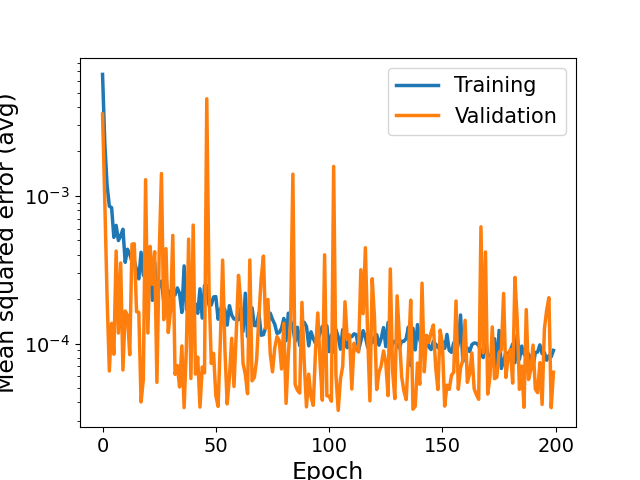

In [31]:
filename = 'test.pdf'
save = False

plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean squared error (avg)')
plt.semilogy(history.epoch, np.array(history.history['loss']), label='Training')
plt.semilogy(history.epoch, np.array(history.history['val_loss']), label = 'Validation')
plt.legend()
plt.show()
if (save):
  plt.savefig(filename, bbox_inches='tight')

## Save the model

In [24]:
# Save the model
model_name = 'Saved_models/tanh_200_epochs_exact'
save_model = True

if (save_model):
  model.save(model_name)

INFO:tensorflow:Assets written to: Saved_models/tanh_200_epochs_exact/assets


2021-10-11 16:51:47.649210: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


## Check the results on the testing set

In [32]:
sorting = np.argsort(features_testing)
features_testing = features_testing[sorting]
labels_testing = labels_testing[sorting]

prediction = model.predict(features_testing)
prediction = np.ravel(prediction)


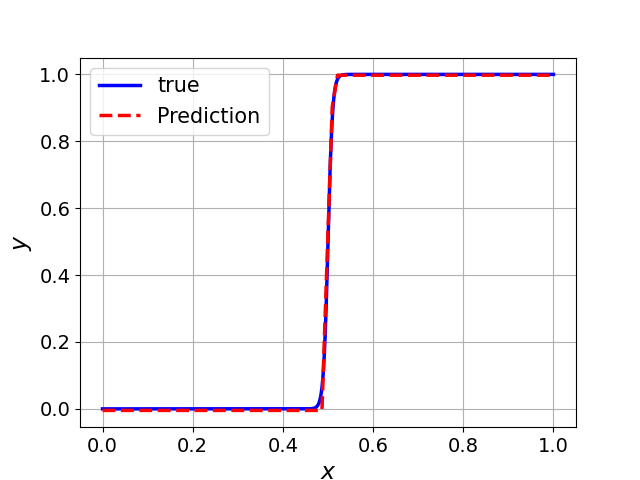

In [33]:
plt.figure()
plt.plot(features_testing, labels_testing, 'b-', label='true')
plt.plot(features_testing, prediction, 'r--', label='Prediction')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid()